In [21]:
from tensorflow.keras.models import load_model
loded_model_Mobile= load_model("Mobild_Net.joblib")

In [2]:
import matplotlib.pyplot as plt 
import cv2 
import numpy as np
import math

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import glob 

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [4]:
Images = Path('C:/Users/cip/Desktop/Oussama/Oussama_Horizon_Images/ALL_Horizon_Images')


In [5]:
filepaths = pd.Series(list(Images.glob(r'**/*.jpg')), name='Filepath').astype(str)

In [6]:
cl = pd.read_csv('C:/Users/cip/Desktop/Oussama/Oussama_Horizon_K/All_Horizon_L_V_R.csv')
cl_Left = cl.iloc[:,3].values
y_left = np.array(cl_Left)

y_left_V = y_left.reshape(5106 ,1)
len (y_left_V) 
y_left_V = y_left_V.reshape( 1, 5106 )
yl = y_left_V_s= pd.Series(y_left,name= 'yl')/100

print (y_left_V_s)

0       5.63
1       5.53
2       5.45
3       5.40
4       5.42
        ... 
5101    8.88
5102    8.90
5103    8.94
5104    8.96
5105    8.96
Name: yl, Length: 5106, dtype: float64


In [7]:
cl_right = cl.iloc[:,4].values
y_right =  np.array(cl_right)
y_right_V = y_right.reshape(5106,1)
len (y_right_V)
type(y_right_V)
yr= y_right_V_s= pd.Series(y_right, name= 'yr')/100
print (y_right_V_s)

0       6.59
1       6.67
2       6.70
3       6.71
4       6.70
        ... 
5101    3.23
5102    3.23
5103    3.22
5104    3.22
5105    3.22
Name: yr, Length: 5106, dtype: float64


In [8]:
filepaths = pd.Series(list(Images.glob(r'**/*.jpg')), name='Filepath').astype(str)
print (filepaths)
type(filepaths)

0       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
1       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
2       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
3       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
4       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
                              ...                        
5101    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5102    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5103    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5104    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5105    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
Name: Filepath, Length: 5106, dtype: object


pandas.core.series.Series

In [9]:

ALL_Data = pd.concat([filepaths,yl,yr], axis = 1).sample(frac = 1.0, random_state=1).reset_index(drop=True)
print(ALL_Data)

                                               Filepath     yl     yr
0     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   9.35   3.25
1     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  10.28   3.23
2     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   7.21   2.97
3     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.24   5.01
4     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.51   5.19
...                                                 ...    ...    ...
5101  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   4.93   5.56
5102  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.13   5.43
5103  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   2.19  10.83
5104  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  12.74   4.11
5105  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   3.79   8.50

[5106 rows x 3 columns]


In [10]:
train_Data, test_Data = train_test_split(ALL_Data, train_size = 0.7, shuffle = True, random_state = 1  )

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yl','yr'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yl','yr'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe= test_Data,
    x_col='Filepath',
    y_col=['yl','yr'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=12,
    shuffle=False
)

Found 2860 validated image filenames.
Found 714 validated image filenames.
Found 1532 validated image filenames.


In [13]:
# predicted_coordination = np.squeeze(loded_model_Sigmoid.predict(test_images))*100
# true_coordination = test_images.labels*100
# print('--> The predected Coordination:')
# print (predicted_coordination)
# print('--> The real Coordination:')
# print(true_coordination)
# print ('--> The averge Error')
# rmse = np.sqrt(loded_model_Sigmoid.evaluate(test_images, verbose=1))
# print("     Test RMSE:")

# print (rmse)

# r2 = r2_score(true_coordination, predicted_coordination)
# print("   Test R^2 Score: ")

# print (r2)

[5.6679745 5.4061923]
   
    Y_L =  567.0 px ,  Y_R =  541.0 px


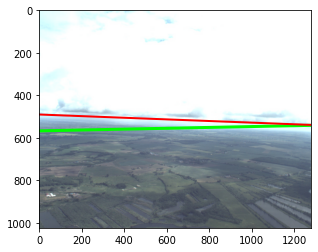

     The roll angle = 1.0 °
     The real roll angle = 2.0 °


In [23]:
img = plt.imread("V_1.jpg")
imgGray = cv2.imread('V_1.jpg')/255
# cv2.imshow("Gray Image", imgGray)
# cv2.waitKey(0)


new_array_1 = cv2.resize(imgGray,(224,224))
# plt.imshow(imgGray,cmap = "gray")
# plt.waitKey(0)
# plt.show()
new_array_2 = new_array_1
new_array_Test = np.array(new_array_2).reshape(1,224,224,3)

import numpy as np
prediction = loded_model_Mobile.predict(new_array_Test)
# print (prediction)


list1 = prediction.tolist()

print (prediction[-1])
a = list1[0]
print('   ')
y_l = round (a[0],2)*100
y_r = round (a [1],2)*100
print ('    Y_L = ', y_l,'px',',',' Y_R = ', y_r,'px')


#######

img2 = plt.imread('V_1.jpg')
X = [0, 1280]
y_L_R =[y_l,y_r]
plt.plot(X, y_L_R, color="lime", linewidth=3)
## True Values 
y_l_t = 490 
y_r_t = 539 
y_l_r_t = [y_l_t , y_r_t]
plt.plot(X, y_l_r_t, color="red", linewidth=2)
plt.imshow(img2)
# plt.waitKey(0)
plt.show()
 #Rolle Winkel 
    
if y_r >= y_l: 
    w= math.tan(((y_r-y_l)/2)/(1280/2))
    print ('     The roll angle =', round(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l-y_r)/2)/(1280/2))
    print ('     The roll angle =',  np.around(math.degrees(math.atan(math.atan(k)))),'°')
    

if y_r_t >= y_l_t: 
    w= math.tan(((y_r_t-y_l_t)/2)/(1280/2))
    print ('     The real roll angle =',np.around(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l_t-y_r_t)/2)/(1280/2))
    print ('     The real roll angle =',  np.around (math.degrees(math.atan(math.atan(k)))),'°')

In [15]:

print (len(imgGray))
print(imgGray.ndim)
print(imgGray.size)
print(imgGray.shape)

print (len(new_array_1))
print(new_array_1.ndim)
print(new_array_1.size)
print(new_array_1.shape)

1024
3
3932160
(1024, 1280, 3)
224
3
150528
(224, 224, 3)


In [16]:
print (len(new_array_Test))
print(new_array_Test.ndim)
print(new_array_Test.size)
print(new_array_Test.shape)

1
4
150528
(1, 224, 224, 3)


[10.920353   2.2252836]
   
    Y_L =  982.8 px ,  Y_R =  200.25 px


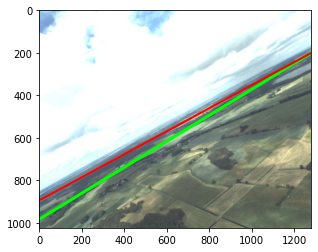

     The roll angle = 31.0 °
     The real roll angle = 28.0 °


In [22]:
img = plt.imread("C(1212).jpg")
imgGray = cv2.imread('C(1212).jpg')/255
# cv2.imshow("Gray Image", imgGray)
# cv2.waitKey(0)


new_array_1 = cv2.resize(imgGray,(224,224))
# plt.imshow(imgGray,cmap = "gray")
# plt.waitKey(0)
# plt.show()
new_array_2 = new_array_1
new_array_Test = np.array(new_array_2).reshape(1,224,224,3)

import numpy as np
prediction = loded_model_Mobile.predict(new_array_Test)
# print (prediction)
# print (prediction)


list1 = prediction.tolist()

print (prediction[-1])
a = list1[0]
print('   ')
y_l = round (a[0],3)*90
y_r = round (a [1],3)*90
print ('    Y_L = ', y_l,'px',',',' Y_R = ', y_r,'px')


#######

img2 = plt.imread('C(1212).jpg')
X = [0, 1280]
y_L_R =[y_l,y_r]
plt.plot(X, y_L_R, color="lime", linewidth=3)
## True Values 
y_l_t = 894 
y_r_t = 200
y_l_r_t = [y_l_t , y_r_t]
plt.plot(X, y_l_r_t, color="red", linewidth=2)
plt.imshow(img2)
# plt.waitKey(0)
plt.show()
 #Rolle Winkel 
    
if y_r >= y_l: 
    w= math.tan(((y_r-y_l)/2)/(1280/2))
    print ('     The roll angle =', round(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l-y_r)/2)/(1280/2))
    print ('     The roll angle =',  np.around(math.degrees(math.atan(math.atan(k)))),'°')
    

if y_r_t >= y_l_t: 
    w= math.tan(((y_r_t-y_l_t)/2)/(1280/2))
    print ('     The real roll angle =',np.around(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l_t-y_r_t)/2)/(1280/2))
    print ('     The real roll angle =',  np.around (math.degrees(math.atan(math.atan(k)))),'°')
    

[5.7321005 5.4810815]
   
    Y_L =  600.0 px ,  Y_R =  600.0 px


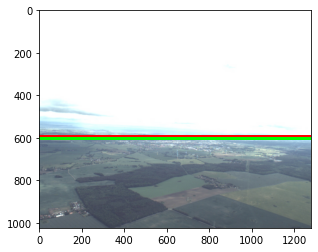

     The roll angle = 0 °
     The real roll angle = 0.0 °


In [18]:
img = plt.imread("B(1191).jpg")
imgGray = cv2.imread('B(1191).jpg')
# cv2.imshow("Gray Image", imgGray)
# cv2.waitKey(0)


new_array_1 = cv2.resize(imgGray,(224,224))
# plt.imshow(imgGray,cmap = "gray")
# plt.waitKey(0)
# plt.show()
new_array_2 = new_array_1
new_array_Test = np.array(new_array_2).reshape(1,224,224,3)/255

import numpy as np
prediction = loded_model_Mobile.predict(new_array_Test)
# print (prediction)
# print (prediction)


list1 = prediction.tolist()

print (prediction[-1])
a = list1[0]
print('   ')
y_l = round (a[0],0)*100
y_r = round (a [1],0)*120
print ('    Y_L = ', y_l,'px',',',' Y_R = ', y_r,'px')


#######

img2 = plt.imread('B(1191).jpg')
X = [0, 1280]
y_L_R =[y_l,y_r]
plt.plot(X, y_L_R, color="lime", linewidth=3)
## True Values 
y_l_t = 590
y_r_t = 590
y_l_r_t = [y_l_t , y_r_t]
plt.plot(X, y_l_r_t, color="red", linewidth=2)
plt.imshow(img2)
# plt.waitKey(0)
plt.show()
 #Rolle Winkel 
    
if y_r >= y_l: 
    w= math.tan(((y_r-y_l)/2)/(1280/2))
    print ('     The roll angle =', round(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l-y_r)/2)/(1280/2))
    print ('     The roll angle =',  np.around(math.degrees(math.atan(math.atan(k)))),'°')
    

if y_r_t >= y_l_t: 
    w= math.tan(((y_r_t-y_l_t)/2)/(1280/2))
    print ('     The real roll angle =',np.around(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l_t-y_r_t)/2)/(1280/2))
    print ('     The real roll angle =',  np.around (math.degrees(math.atan(math.atan(k)))),'°')

[5.7321005 5.4810815]
   
    Y_L =  600.0 px ,  Y_R =  600.0 px


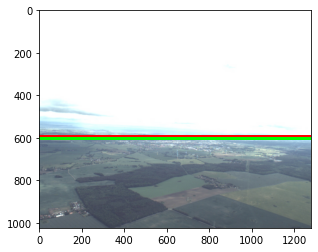

     The roll angle = 0 °
     The real roll angle = 0.0 °


In [19]:
img = plt.imread("B(1191).jpg")
imgGray = cv2.imread('B(1191).jpg')
# cv2.imshow("Gray Image", imgGray)
# cv2.waitKey(0)


new_array_1 = cv2.resize(imgGray,(224,224))
# plt.imshow(imgGray,cmap = "gray")
# plt.waitKey(0)
# plt.show()
new_array_2 = new_array_1
new_array_Test = np.array(new_array_2).reshape(1,224,224,3)/255

import numpy as np
prediction = loded_model_Mobile.predict(new_array_Test)
# print (prediction)
# print (prediction)


list1 = prediction.tolist()

print (prediction[-1])
a = list1[0]
print('   ')
y_l = round (a[0],0)*100
y_r = round (a [1],0)*120
print ('    Y_L = ', y_l,'px',',',' Y_R = ', y_r,'px')


#######

img2 = plt.imread('B(1191).jpg')
X = [0, 1280]
y_L_R =[y_l,y_r]
plt.plot(X, y_L_R, color="lime", linewidth=3)
## True Values 
y_l_t = 590
y_r_t = 590
y_l_r_t = [y_l_t , y_r_t]
plt.plot(X, y_l_r_t, color="red", linewidth=2)
plt.imshow(img2)
# plt.waitKey(0)
plt.show()
 #Rolle Winkel 
    
if y_r >= y_l: 
    w= math.tan(((y_r-y_l)/2)/(1280/2))
    print ('     The roll angle =', round(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l-y_r)/2)/(1280/2))
    print ('     The roll angle =',  np.around(math.degrees(math.atan(math.atan(k)))),'°')
    

if y_r_t >= y_l_t: 
    w= math.tan(((y_r_t-y_l_t)/2)/(1280/2))
    print ('     The real roll angle =',np.around(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l_t-y_r_t)/2)/(1280/2))
    print ('     The real roll angle =',  np.around (math.degrees(math.atan(math.atan(k)))),'°')
    

[7.4573927 3.196496 ]
   
    Y_L =  840.0 px ,  Y_R =  420.0 px


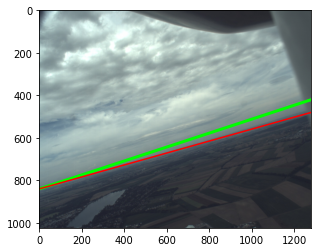

     The roll angle = 18.0 °
     The real roll angle = 16.0 °


In [20]:
img = plt.imread("C(400).jpg")
imgGray = cv2.imread('C(400).jpg')
# cv2.imshow("Gray Image", imgGray)
# cv2.waitKey(0)


new_array_1 = cv2.resize(imgGray,(224,224))
# plt.imshow(imgGray,cmap = "gray")
# plt.waitKey(0)
# plt.show()
new_array_2 = new_array_1
new_array_Test = np.array(new_array_2).reshape(1,224,224,3)/255

import numpy as np
prediction = loded_model_Mobile.predict(new_array_Test)
# print (prediction)


list1 = prediction.tolist()

print (prediction[-1])
a = list1[0]
print('   ')
y_l = round (a[0],0)*120
y_r = round (a [1],0)*140
print ('    Y_L = ', y_l,'px',',',' Y_R = ', y_r,'px')


#######

img2 = plt.imread('C(400).jpg')
X = [0, 1280]
y_L_R =[y_l,y_r]
plt.plot(X, y_L_R, color="lime", linewidth=3)
## True Values 
y_l_t = 840
y_r_t = 480
y_l_r_t = [y_l_t , y_r_t]
plt.plot(X, y_l_r_t, color="red", linewidth=1.5)
plt.imshow(img2)
# plt.waitKey(0)
plt.show()
 #Rolle Winkel 
    
if y_r >= y_l: 
    w= math.tan(((y_r-y_l)/2)/(1280/2))
    print ('     The roll angle =', round(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l-y_r)/2)/(1280/2))
    print ('     The roll angle =',  np.around(math.degrees(math.atan(math.atan(k)))),'°')
    

if y_r_t >= y_l_t: 
    w= math.tan(((y_r_t-y_l_t)/2)/(1280/2))
    print ('     The real roll angle =',np.around(math.degrees(math.atan(w))),'°')
else: 
    k = math.tan(((y_l_t-y_r_t)/2)/(1280/2))
    print ('     The real roll angle =',  np.around (math.degrees(math.atan(math.atan(k)))),'°')
    
    